# Projet 7 : Implémentez un modèle de scoring : Random Forest

L'objectif de ce notebook est l'utilisation de Random Forest pour voir son efficacité sur la classification des clients éligibles ou non à un crédit.

La méthode [Random Forest](https://www.journaldunet.fr/web-tech/guide-de-l-intelligence-artificielle/1501905-random-forest-ou-foret-aleatoire/)
est composée de plusieurs arbres de décision, entrainés de manière indépendante sur des sous-ensembles du data set d'apprentissage (méthode de bagging). Chacun produit une estimation, et c'est la combinaison des résultats qui va donner la prédiction finale qui se traduit par une variance réduite. 


## Importation des modules

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.7 MB/s 


In [ ]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer

## feature importance
import shap

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [ ]:
warnings.filterwarnings("ignore")

##  Importation de données

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [ ]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [ ]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

Les paramètres de notre modèle à optimiser sont :

- (n_estimators) Le nombre d'arbres  
- (max_depth) La profondeur maximale de l'arbre 
- (criterions) La fonction pour mesurer la qualité d'un split. « gini » pour l'impureté de Gini et « entropie » pour le gain d'informations. 

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= RandomForestClassifier(random_state=0).fit(X_train_smtomek,y_train_smtomek)

In [ ]:
model_LR.fit(X_train_smtomek,y_train_smtomek)

RandomForestClassifier(random_state=0)

In [ ]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')

Accuracy: 0.9999566409764452
Precision: 1.0
Recall: 0.9994655978623914


In [ ]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, model_LR.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, model_LR.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, model_LR.predict(X_test_smtomek))}')

Accuracy: 0.9199544733953904
Precision: 0.9090909090909091
Recall: 0.0010147133434804667


In [ ]:
y_prob = model_LR.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test_smtomek, y_pred)

1.0

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113149      1]
 [  9845     10]]

True Positives(TP) =  113149

True Negatives(TN) =  10

False Positives(FP) =  1

False Negatives(FN) =  9845


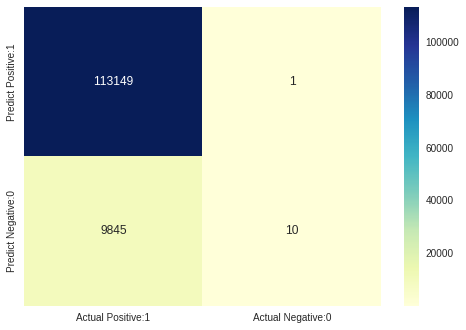

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5005029377587927

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6803699910298983

Text(0.5, 0, 'False Positive Rate')

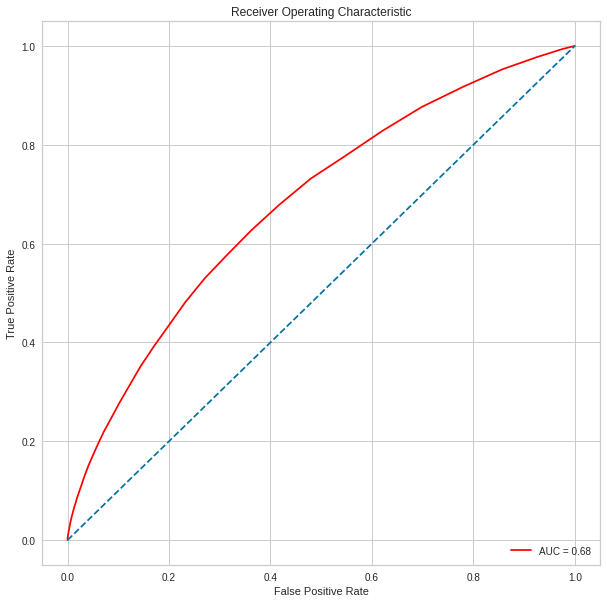

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Optimisation et meilleurs hyperparamètres

In [ ]:
rf = model_LR

On en conclut ici que Random Forest peut nous servir en tant que modèle car il est performant

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 10, num= 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [0,2]
# Minimum number of samples required to split a node
min_samples_split = [1, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 2], 'min_samples_split': [1, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [ ]:
rf.fit(X_train_smtomek, y_train_smtomek)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 5],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 10]},
                   verbose=2)

In [ ]:
rf.best_params_

{'n_estimators': 6,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2,
 'bootstrap': False}

In [ ]:
rfnew= RandomForestClassifier(random_state=0,n_estimators=4,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=2,bootstrap='true').fit(X_train_smtomek,y_train_smtomek)

In [ ]:
rfnew.fit(X_train_smtomek,y_train_smtomek)

RandomForestClassifier(bootstrap='true', max_depth=2, max_features='sqrt',
                       min_samples_split=5, n_estimators=4, random_state=0)

In [ ]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, rfnew.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, rfnew.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, rfnew.predict(X_train_smtomek))}')

Accuracy: 0.9188644271731
Precision: 0.0
Recall: 0.0


In [ ]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, rfnew.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, rfnew.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, rfnew.predict(X_test_smtomek))}')

Accuracy: 0.9198813056379822
Precision: 0.0
Recall: 0.0


In [ ]:
y_prob = rfnew.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rfnew.score(X_test_smtomek, y_pred)

1.0

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113150      0]
 [  9855      0]]

True Positives(TP) =  113150

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  9855


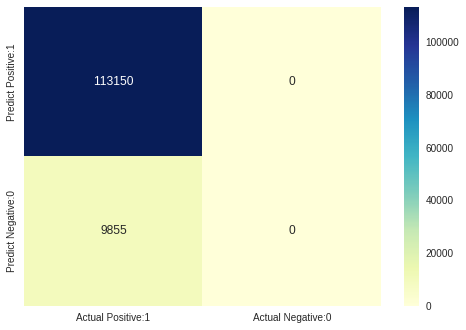

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6456480047744886

Text(0.5, 0, 'False Positive Rate')

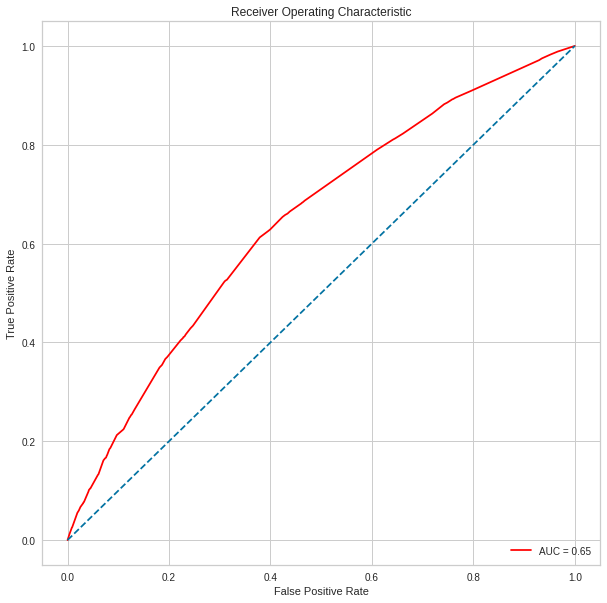

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')